In [141]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import zipcodes
from azureml.opendatasets import UsPopulationZip

import csv

In [142]:
# function to read file from csv 
def load_data(csv_file="DataSet.csv"):
    data = [] 
    with open(csv_file, 'r') as file: 
        for line in csv.DictReader(file): 
            data.append(line) 
    return data

# function to write dict to file
def write_data(data, csv_file="DataSet.csv"):
    csv_columns = list(data[0].keys())
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
            writer.writeheader()
            for line in data:
                writer.writerow(line)
    except IOError:
        print("I/O error")

data = load_data()

In [143]:
# function to index values returned into array predicatably
def relevant_index(val):
    if(val == -8):
        return 0
    return val

### State population processing

In [150]:
#data based on 2010 census with projections for 2019
fs = open("censuspop.csv", 'r+')
census_data = []
population_data = []
state_labels = []
for line in csv.DictReader(fs):
    census_data.append(line)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
for row in census_data:
    row['State'] = us_state_abbrev[row['State']]
    population_data.append(row[' Population'])
    state_labels.append(row['State'])

### How many people didn't change

In [ ]:
#store how many people changed commute
changed_commute = [0, 0, 0]
changed_commute_labels = ['Not Applicable', 'Yes', 'No']

#flag how many people did not have commute change
changed_commute_flag = []

row_count = 0

#loop to collect all data
for row in data:
    if int(row['changemode']) == -8:
        changed_commute_flag.append(row_count)
    changed_commute[relevant_index(int(row['changemode']))] += 1
    row_count += 1

explode = [0.01, .2, .1] 
plt.figure(figsize=(5,5)) #figsize: output figure window size
plt.pie(changed_commute, explode=explode, autopct='%1.2f%%', labels=changed_commute_labels)
plt.title("Percentage of people who changed commute modes based on commute time")

plt.show()

malformed
malformed
malformed
malformed
malformed


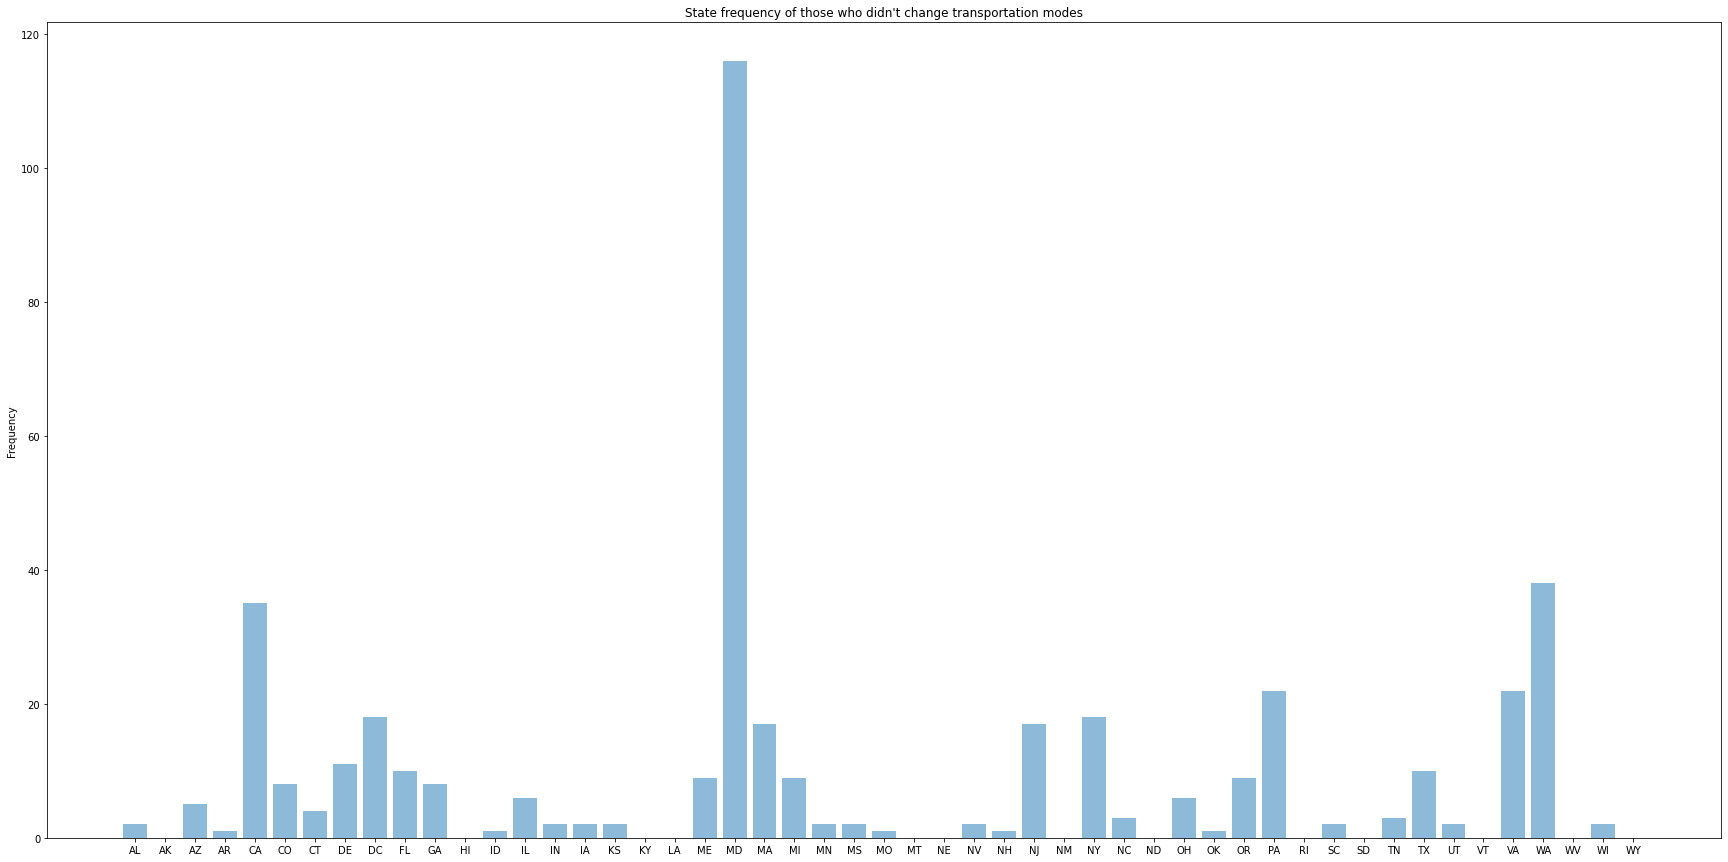

In [151]:
changed_commute_by_state = [0] * len(state_labels)
for row_number in changed_commute_flag:
    data_row = data[row_number]
    try:
        zipcode_data = zipcodes.matching(data_row['Zipcode'])[0]
        changed_commute_by_state[state_labels.index(zipcode_data['state'])] += 1
    except:
        print("malformed")
        
y_pos = np.arange(len(state_labels))

plt.rcParams["figure.figsize"] = (30,15)
plt.bar(y_pos, changed_commute_by_state, align='center', alpha=0.5)
plt.xticks(y_pos, state_labels)
plt.ylabel('Frequency')
plt.title('State frequency of those who didn\'t change transportation modes')

plt.show()

Text(0.5, 1.0, 'States by population')

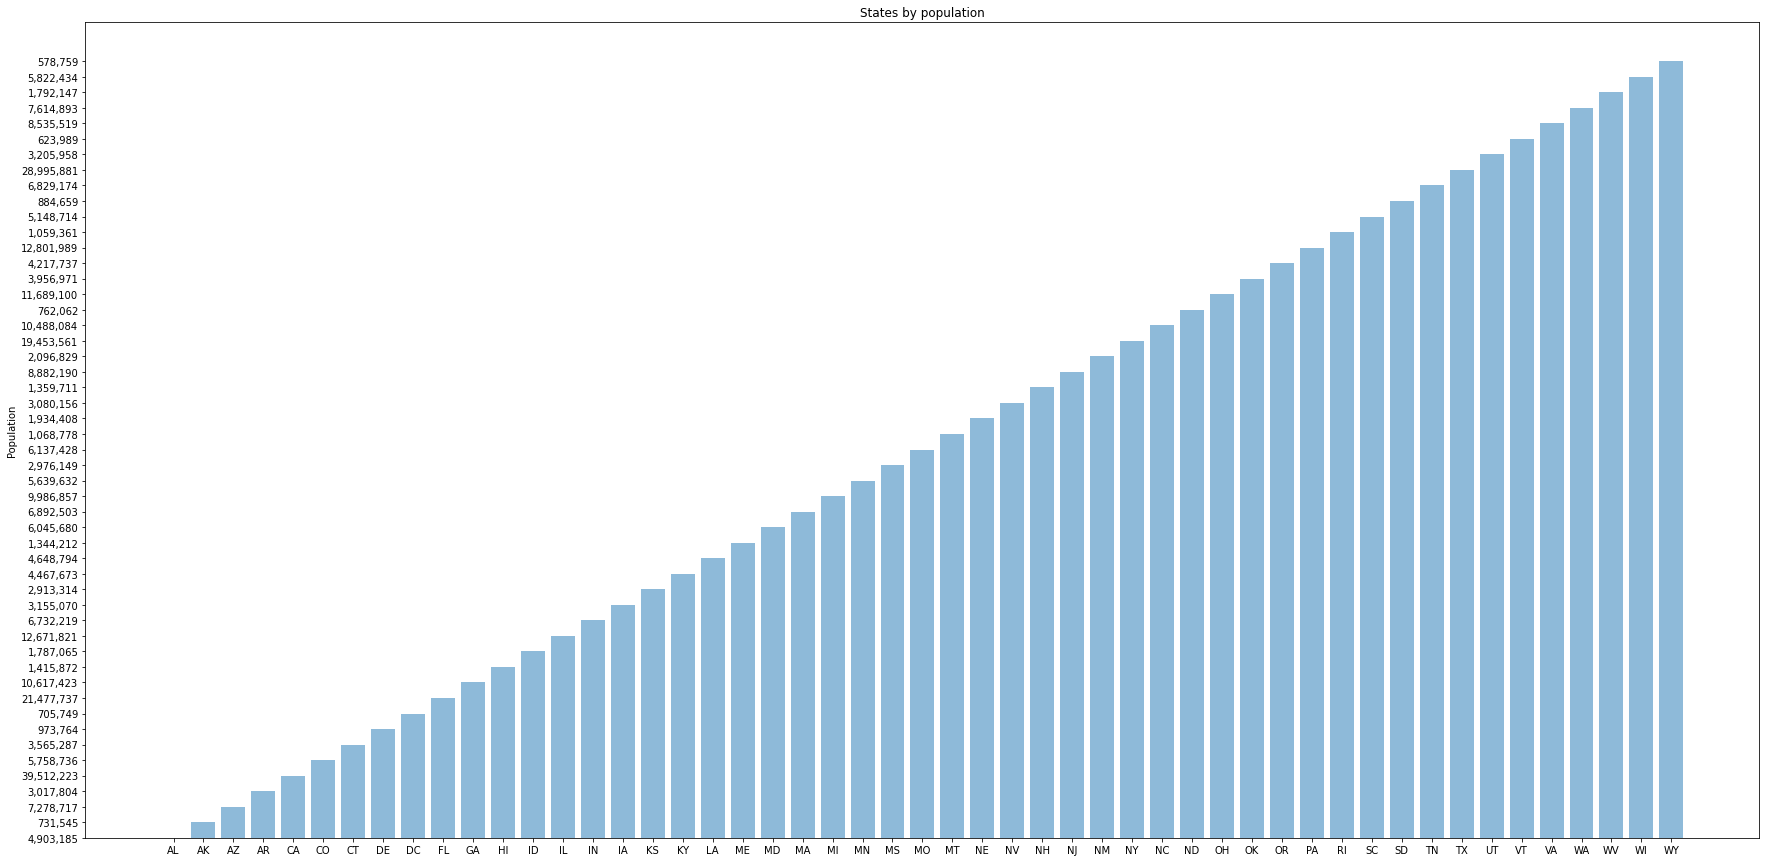

In [168]:
plt.rcParams["figure.figsize"] = (30,15)
plt.bar(y_pos, population_data, align='center', alpha=0.5)
plt.xticks(y_pos, state_labels)
plt.ylabel('Population')
plt.title('States by population')